In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import pulse2percept as p2p

2017-03-31 19:07:37,988 [pulse2percept] [INFO] Welcome to pulse2percept


In [2]:
class InterpSim(p2p.Simulation):
    def __init__(self, implant, name=None, engine='joblib', dojit=True, num_jobs=-1):
        if not isinstance(implant, p2p.implants.ElectrodeArray):
            e_s = "`implant` must be of type p2p.implants.ElectrodeArray"
            raise TypeError(e_s)

        self.name = name
        self.implant = implant
        self.engine = engine
        self.dojit = dojit
        self.num_jobs = num_jobs

        # Optic fiber layer (OFL): After calling `set_optic_fiber_layer`, this
        # variable will contain a `p2p.retina.Grid` object.
        self.ofl = None

        # Ganglion cell layer (GCL): After calling `set_ganglion_cell_layer`,
        # this variable will contain a `p2p.retina.TemporalModel` object.
        self.gcl = None
        
    def set_ganglion_cell_layer(self, loadfile):
        from scipy.interpolate import RegularGridInterpolator
        import pickle
        
        in_list, out_list = pickle.load(open(loadfile, 'rb'))
        in_arr = np.array(in_list)
        amps = np.unique(in_arr[:, 0])
        freqs = np.unique(in_arr[:, 1])
        ecs = np.unique(in_arr[:, 2])
        out_arr = np.array(out_list).reshape((len(amps), len(freqs), len(ecs)))

        self.gcl = RegularGridInterpolator((amps, freqs, ecs), out_arr)#, bounds_error=False, fill_value=None)
        
    def pulse2percept(self, amp, freq, layers=['OFL', 'GCL']):
        if 'OFL' in layers:
            ecs, _ = self.ofl.electrode_ecs(self.implant)
        else:
            _, ecs = self.ofl.electrode_ecs(self.implant)
        ecs = ecs[:, :, 1, 0]
        out_list = [self.gcl([amp, freq, e]) for e in ecs.flatten()]
        return np.array(out_list).reshape(ecs.shape)

In [3]:
implant = p2p.implants.ElectrodeArray('epiretinal', 260, 0, 0, hs=100)

In [4]:
# The pulse2percept model
sim = p2p.Simulation(implant)
sim.set_optic_fiber_layer(sampling=100, x_range=[-1000, 1000], y_range=[-1000, 1000])
tsample = 5e-6
sim.set_ganglion_cell_layer(tsample=tsample)

In [5]:
# The approximated model, interpolated from an input-output function
approx = InterpSim(implant)
approx.set_optic_fiber_layer(sampling=100, x_range=[-1000, 1000], y_range=[-1000, 1000])
approx.set_ganglion_cell_layer('temporal-model-amps-freqs-ecs.dat')
approx.gcl.grid

(array([   0.,   10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,
          90.,  100.,  110.,  120.,  130.,  140.,  150.,  160.,  170.,
         180.,  190.,  200.]),
 array([   0.,   10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,
          90.,  100.,  110.,  120.,  130.,  140.,  150.,  160.,  170.,
         180.,  190.,  200.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
         1.1,  1.2,  1.3,  1.4,  1.5]))

In [6]:
def get_pulse_train(freq, amp, tsample):
    return p2p.stimuli.PulseTrain(tsample, freq=freq, amp=amp,
                                  pulse_dur=0.45 / 1000, interphase_dur=0.45 / 1000,
                                  delay=0, pulsetype='cathodicfirst')

In [7]:
curr_thresh = 22.0
pulse_train = get_pulse_train(20, 1.25 * curr_thresh, tsample)
t = np.arange(pulse_train.data.size) * tsample

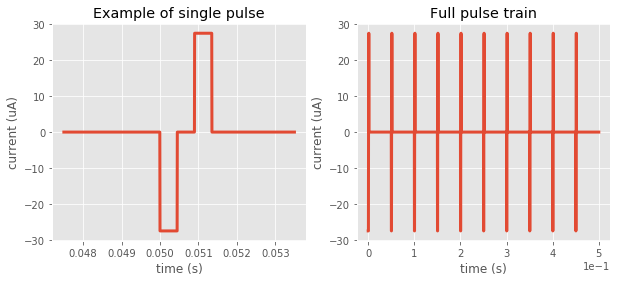

In [8]:
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(t[9500:10700], pulse_train.data[9500:10700], linewidth=3)
plt.xlabel('time (s)')
plt.ylabel('current (uA)')
plt.title('Example of single pulse')

plt.subplot(122)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.plot(t, pulse_train.data, linewidth=3)
plt.xlabel('time (s)')
plt.ylabel('current (uA)')
plt.title('Full pulse train')

In [9]:
# Nanduri 2012 data

# input amplitude values (x threshold) and expected output (brightness)
all_amps = np.array([1.25, 1.5, 2, 4, 6]) * curr_thresh
out_amps = np.array([10, 15, 18, 19, 19])

# input frequency values and expected output
all_freqs = np.array([13, 20, 27, 40, 80, 120])
out_freqs = np.array([7.3, 10, 13, 19, 34, 51])

2017-03-31 19:07:38,947 [pulse2percept.api] [INFO] Starting pulse2percept...
2017-03-31 19:07:39,074 [pulse2percept.api] [INFO] tol=5.0%, 441/441 px selected
2017-03-31 19:08:06,223 [pulse2percept.api] [INFO] Done.
2017-03-31 19:08:06,427 [pulse2percept.api] [INFO] Starting pulse2percept...
2017-03-31 19:08:06,542 [pulse2percept.api] [INFO] tol=5.0%, 441/441 px selected
2017-03-31 19:08:33,599 [pulse2percept.api] [INFO] Done.
2017-03-31 19:08:33,846 [pulse2percept.api] [INFO] Starting pulse2percept...
2017-03-31 19:08:33,962 [pulse2percept.api] [INFO] tol=5.0%, 441/441 px selected
2017-03-31 19:09:01,155 [pulse2percept.api] [INFO] Done.
2017-03-31 19:09:01,366 [pulse2percept.api] [INFO] Starting pulse2percept...
2017-03-31 19:09:01,479 [pulse2percept.api] [INFO] tol=5.0%, 441/441 px selected
2017-03-31 19:09:28,556 [pulse2percept.api] [INFO] Done.
2017-03-31 19:09:28,762 [pulse2percept.api] [INFO] Starting pulse2percept...
2017-03-31 19:09:28,876 [pulse2percept.api] [INFO] tol=5.0%, 44

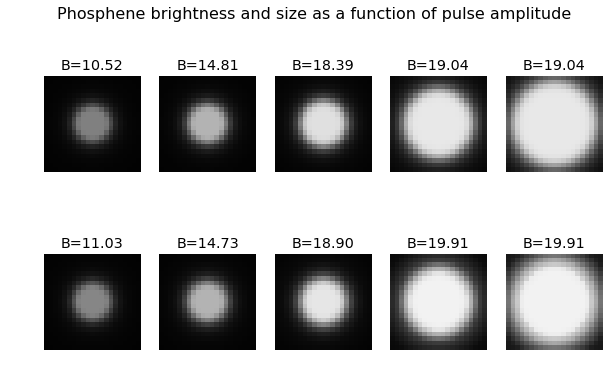

In [10]:
# Run the model on different amplitude values.
# We use current spread instead of effective current spread (use_ecs=False) in order to simulate the
# Nanduri conditions.
plt.figure(figsize=(10, 6))
plt.suptitle('Phosphene brightness and size as a function of pulse '
             'amplitude',
             fontsize=16)
bright_amp = []
for i, ampl in enumerate(all_amps):
    stim = get_pulse_train(20, ampl, tsample)
    resp = sim.pulse2percept(stim, layers=['GCL'])
    bright_amp.append(resp.data.max())
    
    plt.subplot(2, len(all_amps), i + 1)
    frame = p2p.get_brightest_frame(resp)
    plt.imshow(frame.data, cmap='gray', vmin=0, vmax=21)
    plt.axis('off')
    plt.title("B={:.2f}".format(frame.data.max()))
    if i == 0:
        plt.ylabel('pulse2percept')
    
    plt.subplot(2, len(all_amps), len(all_amps) + i + 1)
    resp = approx.pulse2percept(ampl, 20, layers=['GCL'])
    plt.imshow(resp, cmap='gray', vmin=0, vmax=21)
    plt.axis('off')
    plt.title("B={:.2f}".format(resp.max()))
    
    if i == len(all_amps) - 1:
        plt.ylabel('approximated')
plt.savefig('size-amps.png')

bright_amp = np.array(bright_amp)

2017-03-31 19:09:56,655 [pulse2percept.api] [INFO] Starting pulse2percept...
2017-03-31 19:09:56,777 [pulse2percept.api] [INFO] tol=5.0%, 441/441 px selected
2017-03-31 19:10:23,840 [pulse2percept.api] [INFO] Done.
2017-03-31 19:10:24,053 [pulse2percept.api] [INFO] Starting pulse2percept...
2017-03-31 19:10:24,166 [pulse2percept.api] [INFO] tol=5.0%, 441/441 px selected
2017-03-31 19:10:51,319 [pulse2percept.api] [INFO] Done.
2017-03-31 19:10:51,526 [pulse2percept.api] [INFO] Starting pulse2percept...
2017-03-31 19:10:51,641 [pulse2percept.api] [INFO] tol=5.0%, 441/441 px selected
2017-03-31 19:11:18,800 [pulse2percept.api] [INFO] Done.
2017-03-31 19:11:19,014 [pulse2percept.api] [INFO] Starting pulse2percept...
2017-03-31 19:11:19,135 [pulse2percept.api] [INFO] tol=5.0%, 441/441 px selected
2017-03-31 19:11:46,275 [pulse2percept.api] [INFO] Done.
2017-03-31 19:11:46,474 [pulse2percept.api] [INFO] Starting pulse2percept...
2017-03-31 19:11:46,589 [pulse2percept.api] [INFO] tol=5.0%, 44

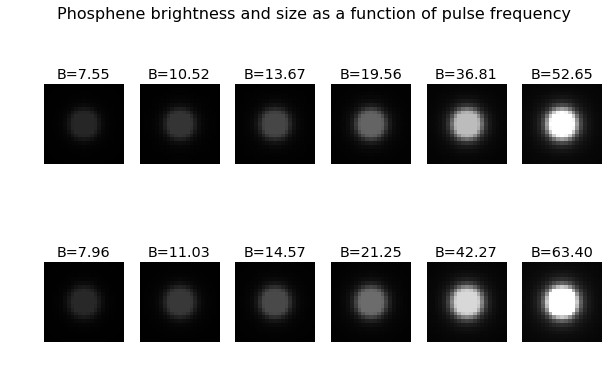

In [11]:
# Run the model on different frequency values
plt.figure(figsize=(10, 6))
plt.suptitle('Phosphene brightness and size as a function of pulse '
             'frequency',
             fontsize=16)
bright_freq = []
for i, freq in enumerate(all_freqs):
    stim = get_pulse_train(freq, 1.25 * curr_thresh, tsample)
    resp = sim.pulse2percept(stim, layers=['GCL'])
    bright_freq.append(resp.data.max())
    
    plt.subplot(2, len(all_freqs), i + 1)

    frame = p2p.get_brightest_frame(resp)
    plt.imshow(frame.data, cmap='gray', vmin=0, vmax=50)
    plt.axis('off')
    plt.title("B={:.2f}".format(frame.data.max()))
    if i == 0:
        plt.ylabel('pulse2percept')
    
    plt.subplot(2, len(all_freqs), len(all_freqs) + i + 1)
    resp = approx.pulse2percept(1.25 * curr_thresh, freq, layers=['GCL'])
    plt.imshow(resp, cmap='gray', vmin=0, vmax=50)
    plt.title("B={:.2f}".format(resp.max()))
    plt.axis('off')
    if i == len(all_amps) - 1:
        plt.ylabel('approximated')
        
plt.savefig('size-freqs.png')

bright_freq = np.array(bright_freq)

(0, 150)

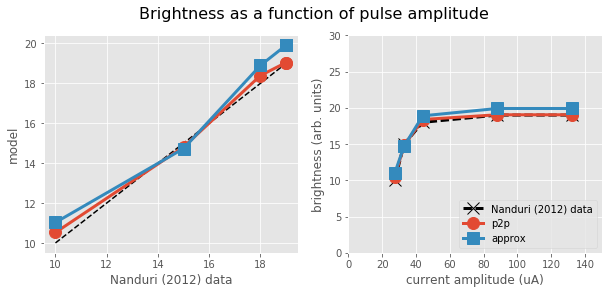

In [12]:
plt.figure(figsize=(10, 4))
plt.suptitle('Brightness as a function of pulse amplitude', fontsize=16)

plt.subplot(121)
plt.plot([out_amps[0], out_amps[-1]], [out_amps[0], out_amps[-1]], '--k')
plt.plot(out_amps, bright_amp, 'o-', linewidth=3, markersize=12)
plt.plot(out_amps, [approx.pulse2percept(a, 20, layers=['GCL']).max()
                    for a in all_amps], 's-', linewidth=3, markersize=12)
plt.xlabel('Nanduri (2012) data')
plt.ylabel('model')

plt.subplot(122)
plt.plot(all_amps, out_amps, '--xk', linewidth=3, markersize=12,
         label='Nanduri (2012) data')
plt.plot(all_amps, bright_amp, '-o', linewidth=3, markersize=12,
         label='p2p')
plt.plot(all_amps, [approx.pulse2percept(a, 20, layers=['GCL']).max()
                    for a in all_amps], 's-', linewidth=3, markersize=12,
         label='approx')
plt.xlabel('current amplitude (uA)')
plt.ylabel('brightness (arb. units)')
plt.legend(loc='lower right')
plt.ylim(0, 30)
plt.xlim(0, 150)

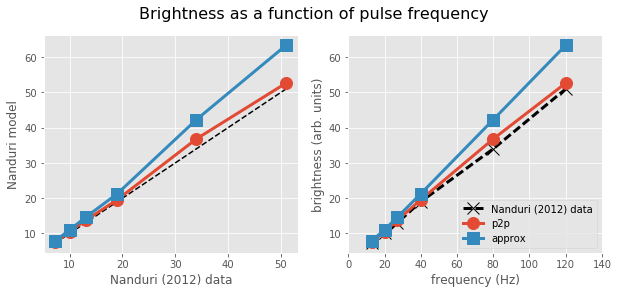

In [15]:
plt.figure(figsize=(10, 4))
plt.suptitle('Brightness as a function of pulse frequency', fontsize=16)

plt.subplot(121)
plt.plot([out_freqs[0], out_freqs[-1]], [out_freqs[0], out_freqs[-1]],
         '--k')
plt.plot(out_freqs, bright_freq, 'o-', linewidth=3, markersize=12)
plt.plot(out_freqs, [approx.pulse2percept(1.25 * curr_thresh, f, layers=['GCL']).max()
                    for f in all_freqs], 's-', linewidth=3, markersize=12)
plt.xlabel('Nanduri (2012) data')
plt.ylabel('Nanduri model')

plt.subplot(122)
plt.plot(all_freqs, out_freqs, '--xk', linewidth=3, markersize=12,
         label='Nanduri (2012) data')
plt.plot(all_freqs, bright_freq, '-o', linewidth=3, markersize=12,
         label='p2p')
plt.plot(all_freqs, [approx.pulse2percept(1.25 * curr_thresh, f, layers=['GCL']).max()
                    for f in all_freqs], 's-', linewidth=3, markersize=12,
         label='approx')
plt.xlabel('frequency (Hz)')
plt.ylabel('brightness (arb. units)')
plt.legend(loc='lower right')
plt.xlim(0, 140)
plt.savefig('nanduri-freqs.png')